$\frac{dP_i}{dt}=\sum_j P_j T_{j\to i}-\sum_j P_i T_{i\to j}$


$p_i(k,t_i,t+1) = \sum_{l=0}^m p(l;m)p_i(k-l,t_i,t)$

$P(k,t)=\frac{1}{t}\sum_{t_i=1}^t p_i(k,t_i,t)$

$(t+1)P(k,t+1)-\delta(k-m)\approx(t-\frac{k}{2})P(k,t)+(\frac{k-1}{2})P(k-1,t)$

$P(k,t+1)-P(k,t)=\frac{dP(k,t)}{dt}$

$2t\frac{dP(k,t)}{dt}=(k-1)P(k-1,t)-(k+2)P(k,t)+2\delta(k-m)$

$P(k)=lim_{t\to\infty}P(k,t)$

$P(k)=\frac{k-1}{k+2}P(k-1)$ dla k>m

$P(m)=\frac{2}{m+2}$

$P(k)=\frac{2m(m+1)}{k(k+1)(k+2)}$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from random import choice, randrange
from scipy import stats, integrate
import scipy

In [2]:
m = 2

In [3]:
def generate_preferential_BA(m0: int, m: int, n: int):
    halfedges = []
    neighbors_by_node = [[] for _ in range(n)]

    for i in range(0, m0):
        for j in range(i+1, m0):
            halfedges += [i, j]
            neighbors_by_node[i] += [j]
            neighbors_by_node[j] += [i]

    for i in range(m0,n):
        nodes = []

        for _ in range(m):
            while True:
                node = choice(halfedges) if len(halfedges) > 0 else 0
                if node not in nodes:
                    break
            nodes += [node]
            
        for node in nodes:
            halfedges+=[i, node]
            neighbors_by_node[i] += [node]
            neighbors_by_node[node] += [i]

    degrees_by_node = [len(x) for x in neighbors_by_node]

    degrees = [x for x in set(degrees_by_node)]

    degree_distribution = [degrees_by_node.count(x) for x in set(degrees_by_node)]
    number_by_degree = degree_distribution
    degree_distribution = degree_distribution/np.sum(degree_distribution)
    
    knn = [[] for _ in range(len(degrees))]
    for i in range(n):
        for j in range(len(degrees)):
           if degrees_by_node[i] == degrees[j]:
               knn[j] += [np.mean([degrees_by_node[neighbor] for neighbor in neighbors_by_node[i]])]

    nearest_neighbors_degree = [np.mean(x) for x in knn]

    return degrees, degree_distribution, degrees_by_node, number_by_degree


In [4]:
def generate_mixed_BA(m0: int, n: int):
    halfedges = []
    neighbors_by_node = [[] for _ in range(n)]

    for i in range(0, m0):
        for j in range(i+1, m0):
            halfedges += [i, j]
            neighbors_by_node[i] += [j]
            neighbors_by_node[j] += [i]

    for i in range(m0,n):
        nodes = []

        
        while True:
            node = choice(halfedges) if len(halfedges) > 0 else 0
            if node not in nodes:
                break
        nodes += [node]

        while True:
            node = randrange(0, i)
            # node = choice(halfedges)
            if node not in nodes:
                break
        nodes.append(node)
            
        for node in nodes:
            halfedges+=[i, node]
            neighbors_by_node[i] += [node]
            neighbors_by_node[node] += [i]

    degrees_by_node = [len(x) for x in neighbors_by_node]

    degrees = [x for x in set(degrees_by_node)]

    degree_distribution = [degrees_by_node.count(x) for x in set(degrees_by_node)]
    number_by_degree = degree_distribution
    degree_distribution = degree_distribution/np.sum(degree_distribution)
    
    knn = [[] for _ in range(len(degrees))]
    for i in range(n):
        for j in range(len(degrees)):
           if degrees_by_node[i] == degrees[j]:
               knn[j] += [np.mean([degrees_by_node[neighbor] for neighbor in neighbors_by_node[i]])]

    nearest_neighbors_degree = [np.mean(x) for x in knn]

    return degrees, degree_distribution, degrees_by_node, number_by_degree

In [5]:
pref_degree, pref_degree_dist, pref_degrees_by_node, pref_number = generate_preferential_BA(m0=2, m=2, n=1_000_000)

In [6]:
mixed_degree, mixed_degree_dist, mixed_degrees_by_node, mixed_number  = generate_mixed_BA(m0=2, n=1_000_000)

In [7]:
def f1(x):
    return 2*m*(m+1)/x/(x+1)/(x+2)

def f2(x):
    return (m+7)*(m+6)*(m+5)*(m+4)/((x+8)*(x+7)*(x+6)*(x+5)*(x+4))*4

In [8]:
x1 = np.arange(m,max(pref_degree)+1)
x2 = np.arange(m,max(mixed_degree)+1)

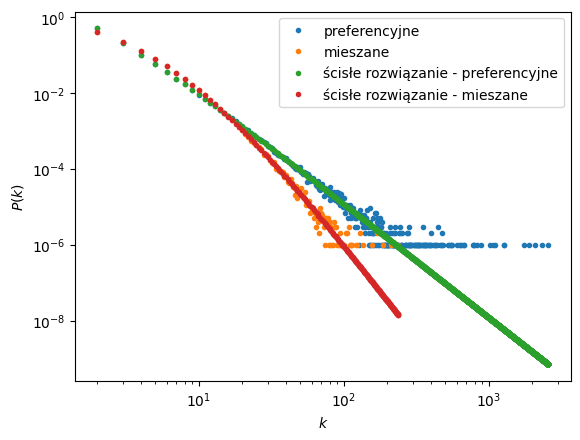

In [9]:
fig, ax = plt.subplots()


ax.set_ylabel(r'$P(k)$')

ax.set_xlabel(r'$k$')

ax.set_xscale('log')
ax.set_yscale('log')

ax.plot(pref_degree, pref_degree_dist, 'o', markersize=3, label="preferencyjne")
ax.plot(mixed_degree, mixed_degree_dist, 'o', markersize=3, label="mieszane")
ax.plot(x1, f1(x1), 'o', markersize=3, label='ścisłe rozwiązanie - preferencyjne')
ax.plot(x2, f2(x2), 'o', markersize=3, label='ścisłe rozwiązanie - mieszane')
plt.legend()
plt.show()

In [10]:
def cumulate(d, dd):
    d_c = np.arange(max(d)+1)

    dd_c = np.zeros_like(d_c, dtype=float)

    for i, d_i in enumerate(d):
        dd_c[d_i] = dd[i]

    dd_c = [np.sum(dd_c[i:]) for i in range(len(dd_c))]

    return d_c, dd_c

def padding(d, dd):
    d_c = np.arange(max(d)+1)

    dd_c = np.zeros_like(d_c, dtype=float)

    for i, d_i in enumerate(d):
        dd_c[d_i] = dd[i]

    return d_c, dd_c

In [11]:
pref_degree_c, pref_degree_dist_c = cumulate(pref_degree, pref_degree_dist)
mixed_degree_c, mixed_degree_dist_c = cumulate(mixed_degree, mixed_degree_dist)
pref_degree_0, pref_degree_dist_0 = padding(pref_degree, pref_degree_dist)
mixed_degree_0, mixed_degree_dist_0 = padding(mixed_degree, mixed_degree_dist)
x1_c, f1x1_c = cumulate(x1, f1(x1))
x2_c, f2x2_c = cumulate(x2, f2(x2))

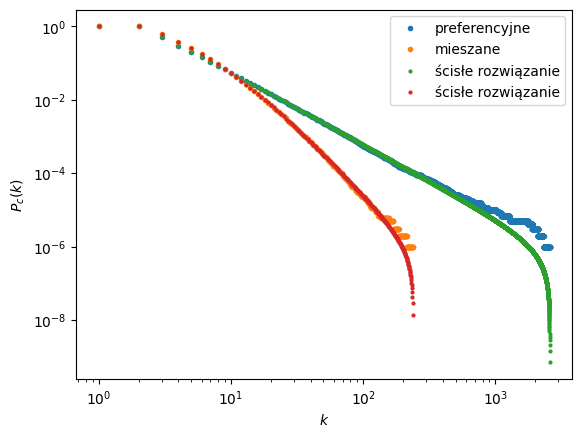

In [23]:
fig, ax = plt.subplots()


ax.set_ylabel(r'$P_c(k)$')

ax.set_xlabel(r'$k$')

ax.set_xscale('log')
ax.set_yscale('log')

ax.plot(pref_degree_c, pref_degree_dist_c, 'o', markersize=3, label="preferencyjne")
ax.plot(mixed_degree_c, mixed_degree_dist_c, 'o', markersize=3, label="mieszane")
ax.plot(x1_c, f1x1_c, 'o', markersize=2, label='ścisłe rozwiązanie')
ax.plot(x2_c, f2x2_c, 'o', markersize=2, label='ścisłe rozwiązanie')
plt.legend()
plt.show()

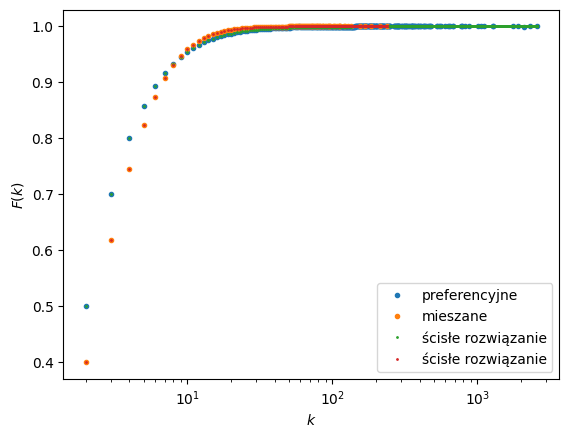

In [13]:
fig, ax = plt.subplots()

ax.set_ylabel(r'$F(k)$')

ax.set_xlabel(r'$k$')

ax.set_xscale('log')
# ax.set_yscale('log')

ax.plot(pref_degree, np.cumsum(pref_degree_dist), 'o', markersize=3, label="preferencyjne")
ax.plot(mixed_degree, np.cumsum(mixed_degree_dist), 'o', markersize=3, label="mieszane")
ax.plot(x1, np.cumsum(f1(x1)), 'o', markersize=1, label='ścisłe rozwiązanie')
ax.plot(x2, np.cumsum(f2(x2)), 'o', markersize=1, label='ścisłe rozwiązanie')
plt.legend()
plt.show()

In [18]:
a = f1(np.array(pref_degree_0[m:]))
a = a/np.sum(a)




scipy.stats.chisquare(pref_degree_dist_0[2:], a, )


Power_divergenceResult(statistic=0.0058479600994589005, pvalue=1.0)

In [15]:
a = f1(np.array(pref_degree))
a = a/np.sum(a)



scipy.stats.chisquare(pref_degree_dist, a)



Power_divergenceResult(statistic=0.005741893313964895, pvalue=1.0)

In [16]:
b = f2(np.array(mixed_degree))
b = b/np.sum(b)

scipy.stats.chisquare(mixed_degree_dist, b)

Power_divergenceResult(statistic=0.00031057769530780014, pvalue=1.0)